# Wiki rima (5) tutorial Python notebook

Use this notebook to help you code and calculate answers to the Week 5 tutorial question. We'll assume you're familar with Python operations now, so get straight to it.

Remeber, useful equations for the tutorial should be in your class notes or the lecture summary notes on Learn.


In [1]:
# Load packages - add any others you might need
import pandas as pd
import numpy as np
import math

In [2]:
# Begin code! 
# Question 1
# Define LHV equation
def LHV(HHV, M, H):
    #HHV in MJ/kg
    #M is moisture in %
    #H is H2 content in %
    #return LHV in MJ/kg 
    lhv = HHV*(1-M/100) - 2.44*(M/100) - 2.44*(H/100)*8.936*(1-M/100)  
    return lhv

In [7]:
# Question 1
# Calculate LHV for fuel 
hhv = 36.5 #MJ/kg
m = 43
h = 7.2

lhv_fuel = LHV(hhv,m,h)
print('The LHV of the input fuel is {lhv:.2f} MJ/kg'.format(lhv=lhv_fuel))

T_h = 219+273
T_c = 21+273
cap = 5.4 #MW
CF = 0.6

# Calculate the efficiency of the power plant
eta_c = 1 - T_c/T_h
eta_pp = 0.7 * eta_c

# Calculate the amount of energy input required
E_in = (cap*CF*8760)/eta_pp * 3600 #in MWh, converted to MJ
print('The energy input required is {e:.2E} MJ'.format(e=E_in))

# With energy input and LHV, we calculate the mass of fuel required
mass = E_in/lhv_fuel #kg
print('The annual mass of fuel required is {m:.2E} kg'.format(m=mass))

# Now, with energy and carbon content, we calculate the carbon emissions
cc = 28.4 #kg C/GJ
e_co2 = E_in * cc * 44/12 * 1/1000 #in kg
print('The annual emissions of carbon dioxide are {em:.2E} kg'.format(em=e_co2))

The LHV of the input fuel is 18.86 MJ/kg
The energy input required is 3.63E+08 MJ
The annual mass of fuel required is 1.92E+07 kg
The annual emissions of carbon dioxide are 3.78E+07 kg


In [44]:
# Challenge
import scipy.stats as st
#variable inputs
m_mean = 43
m_std = 4
h_mean = 7.2
h_std = 1.1
cc_mean = 28.4
cc_std = 3.2
hhv_mean = 36.5
hhv_std = 4.2

#initialise an empty list to store computed carbon emission values
eco2_vals = []
E_vals = []
mass_vals = []

#distributions
sample = 5000
m_dist = np.random.normal(m_mean, m_std, sample)
h_dist = np.random.normal(h_mean, h_std, sample)
hhv_dist = np.random.normal(hhv_mean, h_std, sample)
cc_dist = np.random.normal(cc_mean, cc_std, sample)

for j in range(0, sample):
    
    m_value = np.random.choice(m_dist)
    h_value = np.random.choice(h_dist)
    hhv_value = np.random.choice(hhv_dist)
    cc_value = np.random.choice(cc_dist)
        
    lhv_value = LHV(hhv_value,m_value,h_value)

    mass_i = E_in/lhv_value

    eco2_i = E_in * cc_value * 44/12 * 1/1000
    
    mass_vals.append(mass_i)
    eco2_vals.append(eco2_i)

average_mass = np.mean(mass_vals)
average_emissions = np.mean(eco2_vals)
ci_m = st.norm.interval(alpha=0.95, loc=average_mass, scale = st.sem(mass_vals))
ci_em = st.norm.interval(alpha=0.95, loc=average_emissions, scale = st.sem(eco2_vals))

print('The average mass after {s:.0f} simulations is {mass:.2E} tonnes (+/- {ci:.2E})'.format(s=sample,mass=average_mass/1000, ci = (average_mass-ci_m[0])/1000))
print('The average emissions after {s:.0f} simulations is {emission:.2E} tonnes (+/- {ci:.2E})'.format(s=sample, emission=average_emissions/1000,  ci = (average_emissions-ci_em[0])/1000))

The average mass after 5000 simulations is 1.93E+04 tonnes (+/- 4.67E+01)
The average emissions after 5000 simulations is 3.77E+04 tonnes (+/- 1.20E+02)


Text(0.5, 1.0, 'CO2 simulation')

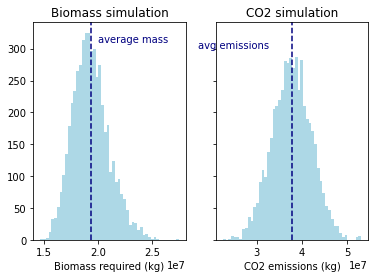

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.hist(mass_vals, color='lightblue', bins=50)
ax1.axvline(average_mass, ls = '--', color='navy')
ax1.text(2*10**7, 310, 'average mass', color='navy')
ax1.set_xlabel('Biomass required (kg)')
ax1.set_title('Biomass simulation')
ax2.hist(eco2_vals, color='lightblue', bins=50)
ax2.axvline(average_emissions, ls = '--', color='navy')
ax2.text(1.7*10**7, 300, 'avg emissions', color='navy')
ax2.set_xlabel('CO2 emissions (kg)')
ax2.set_title('CO2 simulation')